# Load the libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datetime


import yfinance as yf

from API import NEWS_API
from newsapi import NewsApiClient


import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.preprocessing import MinMaxScaler

# Choosing the dates

In [184]:
TRAIN_START_DATE = '2000-01-01'
TRAIN_END_DATE = '2022-12-31'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2025-02-01'

# Choosing the symbols

In [185]:
symbols = {
    'MSFT',
    'NVDA',
    'META',
    'AAPL'
}

# Load the train data

In [186]:
train_data = {}

for symbol in symbols:
    train_data[symbol] = yf.download(
                            symbol, 
                            start=TRAIN_START_DATE, 
                            end=TRAIN_END_DATE, 
                            interval="1d"
                        )

print(train_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2000-01-03   35.792301   36.425623   34.391316   36.041792  53228400
2000-01-04   34.583229   35.965023   34.468080   34.871103  54119000
2000-01-05   34.947891   35.734747   33.585288   34.122653  64059600
2000-01-06   33.777176   34.967054   33.278195   34.448881  54976600
2000-01-07   34.218597   34.468088   32.951953   33.354976  62013600
...                ...         ...         ...         ...       ...
2022-12-23  234.405411  234.542874  229.702188  231.832877  21207000
2022-12-27  232.667511  234.601811  231.557976  234.375982  16688600
2022-12-28  230.281509  235.377495  229.928030  232.598759  17457100
2022-12-29  236.644119  237.537638  231.381215  231.381215  19770700
2022-12-30  235.475693  235.613156  232.372932  233.894857  21938500

[5787 rows x 5 columns]


# Check the columns

In [187]:
print(train_data['NVDA'].columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


# Load the test data

In [188]:
test_data = {}

for symbol in symbols:
    test_data[symbol] = yf.download(
                            symbol, 
                            start=TEST_START_DATE, 
                            end=TEST_END_DATE, 
                            interval="1d"
                        )
print(test_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2023-01-03  235.240021  241.298250  233.099504  238.676618  25740000
2023-01-04  224.949860  228.651555  221.866741  228.072247  50623400
2023-01-05  218.282852  223.427935  217.742812  223.084269  39585600
2023-01-06  220.855392  221.670359  215.376487  218.960362  43613600
2023-01-09  223.005737  227.051114  222.308607  222.347876  27369800
...                ...         ...         ...         ...       ...
2025-01-27  433.690399  434.329133  422.652534  423.161523  35647800
2025-01-28  446.305115  447.482746  430.516765  433.730323  23491700
2025-01-29  441.444824  445.985737  439.518694  445.796115  23581400
2025-01-30  414.159546  422.013792  412.333221  417.931980  54586300
2025-01-31  414.229431  419.848170  414.079737  418.141600  34223400

[522 rows x 5 columns]


# Load the news with newsapi.org - only the previous month

In [189]:
newsapi = NewsApiClient(api_key=NEWS_API)

In [190]:
news_data = newsapi.get_everything(q = "Microsoft", language="en", page_size=20)

In [191]:
articles = news_data['articles']
news_df = pd.DataFrame(articles)

In [192]:
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Wes Davis,Microsoft’s new Dragon Copilot is an AI assist...,Microsoft has announced Microsoft Dragon Copil...,https://www.theverge.com/news/622528/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-03-03T18:22:43Z,Dragon Copilot offers dictation and ambient li...
1,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft is testing free Office for Windows a...,Microsoft has started testing a free version o...,https://www.theverge.com/news/618278/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-25T09:58:17Z,"The free desktop versions of Word, Excel, and ..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft is shutting down Skype in favor of T...,It’s the end of an era. Microsoft is shutting ...,https://www.theverge.com/news/621353/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-28T14:22:43Z,"Skype will be retired on May 5th, and existing..."
3,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft releases a Copilot app for Mac,Microsoft is releasing a native Copilot app fo...,https://www.theverge.com/news/621114/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-27T20:42:04Z,The Copilot app on iPhone and iPad is also bei...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft makes Copilot Voice and Think Deeper...,Microsoft made OpenAI’s o1 reasoning model fre...,https://www.theverge.com/news/619199/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-25T17:53:48Z,You wont hit any limits using OpenAIs o1 reaso...
5,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft announces quantum computing breakthr...,Microsoft believes it has made a key breakthro...,https://www.theverge.com/news/614205/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-19T13:56:29Z,Microsoft has spent 17 years researching a new...
6,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft’s Xbox AI era starts with a model th...,I reported in November that Microsoft was abou...,https://www.theverge.com/news/615048/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-19T16:03:06Z,Microsoft Research and Xbox game studio Ninja ...
7,"{'id': 'wired', 'name': 'Wired'}",Julian Chokkattu,Gear News of the Week: Skype Will Close for Go...,Plus: The FDA clears Google’s Loss of Pulse fe...,https://www.wired.com/story/photoshop-finally-...,https://media.wired.com/photos/67c26ff90f06634...,2025-03-01T11:00:00Z,Pour out a little liquor. Microsoft has announ...
8,"{'id': None, 'name': 'Gizmodo.com'}",AJ Dellinger,Microsoft Study Finds Relying on AI Kills Your...,Researchers from Microsoft and Carnegie Mellon...,https://gizmodo.com/microsoft-study-finds-rely...,https://gizmodo.com/app/uploads/2024/08/chatgp...,2025-02-10T19:50:01Z,Artificial intelligence may one day make human...
9,"{'id': None, 'name': 'Gizmodo.com'}",Kyle Barr,"Microsoft Plans to Kill Skype, but Did It Ever...",Microsoft will take Skype offline on May 5 and...,https://gizmodo.com/microsoft-plans-to-kill-sk...,https://gizmodo.com/app/uploads/2019/08/x7srfg...,2025-02-28T16:00:29Z,Skype is going to go the way of Dodo in a few ...


# Merge the train and test data and preprocess them

In [193]:
train_close_list = []
for symbol in symbols:
    tmp = train_data[symbol]['Close']
    train_close_list.append(tmp)

train_merged = pd.concat(train_close_list, axis=1)
train_merged.dropna(inplace=True)

print("Train merged shape:", train_merged.shape)
print(train_merged.head())

Train merged shape: (2673, 4)
Ticker           AAPL       META      NVDA       MSFT
Date                                                 
2012-05-18  15.961043  38.084518  0.276960  23.350197
2012-05-21  16.890934  33.900501  0.281774  23.733110
2012-05-22  16.761229  30.882032  0.278335  23.741089
2012-05-23  17.170206  31.878229  0.285214  23.222544
2012-05-24  17.012510  32.904308  0.277648  23.190634


In [194]:
test_close_list = []
for symbol in symbols:
    tmp = test_data[symbol]['Close']
    test_close_list.append(tmp)

test_merged = pd.concat(test_close_list, axis=1)
test_merged.dropna(inplace=True)

print("Test merged shape:", test_merged.shape)
print(test_merged.head())

Test merged shape: (522, 4)
Ticker            AAPL        META       NVDA        MSFT
Date                                                     
2023-01-03  123.632515  124.265320  14.304596  235.240021
2023-01-04  124.907700  126.885307  14.738280  224.949860
2023-01-05  123.583092  126.456947  14.254632  218.282852
2023-01-06  128.130234  129.525223  14.848200  220.855392
2023-01-09  128.654129  128.977310  15.616641  223.005737


# Scale the data

In [195]:
scaler = MinMaxScaler(feature_range=(0, 1))


train_values = train_merged.values
test_values = test_merged.values


scaler.fit(train_values)


train_scaled = scaler.transform(train_values)
test_scaled = scaler.transform(test_values)

print("Scaled train shape:", train_scaled.shape)
print("Scaled test shape:", test_scaled.shape)

Scaled train shape: (2673, 4)
Scaled test shape: (522, 4)


# Predict the price when looking back 60 day ago

In [196]:
def create_sequences_multisymbol(dataset, lookback=60):
    """
    dataset: NumPy array of shape (num_days, 4) for 4 symbols
    lookback: number of timesteps to use as input
    
    Returns X, y:
      X.shape = (num_samples, lookback, 4)
      y.shape = (num_samples, 4)
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        seq_X = dataset[i : i + lookback]
        seq_y = dataset[i + lookback]
        X.append(seq_X)
        y.append(seq_y)
    return np.array(X), np.array(y)

lookback_window = 60
X_train_all, y_train_all = create_sequences_multisymbol(train_scaled, lookback_window)
X_test_all, y_test_all = create_sequences_multisymbol(test_scaled, lookback_window)

print("X_train_all shape:", X_train_all.shape)
print("y_train_all shape:", y_train_all.shape) 

print("X_test_all shape:", X_test_all.shape)
print("y_test_all shape:", y_test_all.shape)


X_train_all shape: (2613, 60, 4)
y_train_all shape: (2613, 4)
X_test_all shape: (462, 60, 4)
y_test_all shape: (462, 4)


# Build model

In [197]:
model = keras.Sequential([
    layers.Input(shape=(lookback_window, 4)),
    # First LSTM layer returns the entire sequence for the next LSTM
    layers.LSTM(64, return_sequences=True),
    # Second LSTM layer returns the final output
    layers.LSTM(64, return_sequences=False),
    # Dense layer for your final output (4 symbols)
    layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 64)            17664     
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


# Train model

In [198]:
history = model.fit(
    X_train_all,
    y_train_all,
    epochs=20,
    batch_size=32,
    validation_split=0.1,   # 10% of training data used for validation
    verbose=1
)

Epoch 1/20
74/74 [==============================] - 7s 67ms/step - loss: 0.0067 - val_loss: 0.0207
Epoch 2/20
74/74 [==============================] - 4s 55ms/step - loss: 6.6713e-04 - val_loss: 0.0118
Epoch 3/20
74/74 [==============================] - 4s 54ms/step - loss: 4.6763e-04 - val_loss: 0.0075
Epoch 4/20
74/74 [==============================] - 4s 55ms/step - loss: 3.7693e-04 - val_loss: 0.0052
Epoch 5/20
74/74 [==============================] - 4s 54ms/step - loss: 3.4619e-04 - val_loss: 0.0049
Epoch 6/20
74/74 [==============================] - 4s 54ms/step - loss: 3.1590e-04 - val_loss: 0.0052
Epoch 7/20
74/74 [==============================] - 4s 56ms/step - loss: 2.9334e-04 - val_loss: 0.0046
Epoch 8/20
74/74 [==============================] - 4s 56ms/step - loss: 3.0929e-04 - val_loss: 0.0053
Epoch 9/20
74/74 [==============================] - 4s 55ms/step - loss: 3.2729e-04 - val_loss: 0.0036
Epoch 10/20
74/74 [==============================] - 4s 56ms/step - loss: 2.7

In [199]:
pred_scaled = model.predict(X_test_all)       # shape = (num_samples, 4)
y_test_pred = scaler.inverse_transform(pred_scaled)
y_test_true = scaler.inverse_transform(y_test_all)

print("Predicted shape:", y_test_pred.shape)
print("Actual shape:", y_test_true.shape)

# Print the first few predictions vs actual
for i in range(10):
    print(f"Day {i}: ")
    print("  Predicted:", y_test_pred[i])
    print("  Actual:   ", y_test_true[i])

15/15 [==============================] - 1s 19ms/step
Predicted shape: (462, 4)
Actual shape: (462, 4)
Day 0: 
  Predicted: [160.36647  217.04634   25.963684 274.20905 ]
  Actual:    [160.73899841 207.04908752  27.36774445 279.60305786]
Day 1: 
  Predicted: [160.98027  217.87901   26.134504 275.46707 ]
  Actual:    [163.25363159 211.13348389  27.76152611 283.78646851]
Day 2: 
  Predicted: [161.81099 219.06221  26.34247 277.0946 ]
  Actual:    [164.51094055 212.25920105  27.94942093 282.73327637]
Day 3: 
  Predicted: [162.75142  220.41753   26.556791 278.72134 ]
  Actual:    [163.97634888 213.90289307  27.43770409 282.68399048]
Day 4: 
  Predicted: [163.61794  221.91257   26.712341 279.99628 ]
  Actual:    [162.12501526 210.67523193  26.86602592 279.88848877]
Day 5: 
  Predicted: [164.18825 223.10487  26.76424 280.59204]
  Actual:    [163.01602173 215.27767944  27.02193832 287.03482056]
Day 6: 
  Predicted: [164.68347  224.4273    26.792568 281.3408  ]
  Actual:    [160.41229248 213.932

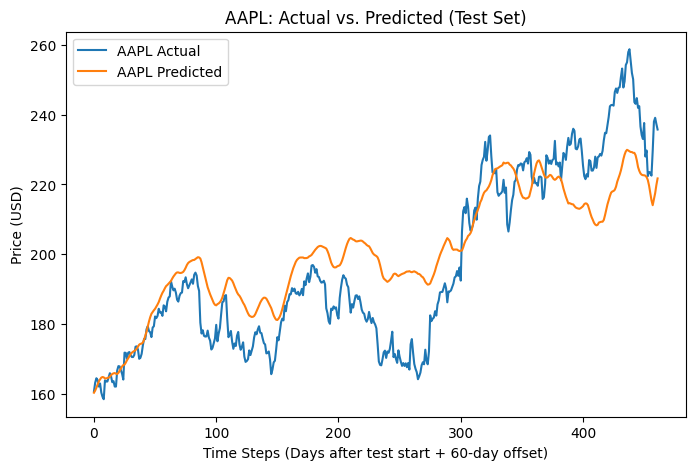

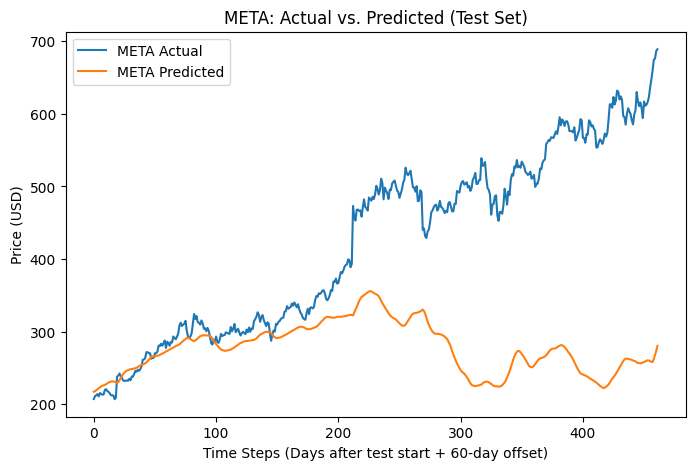

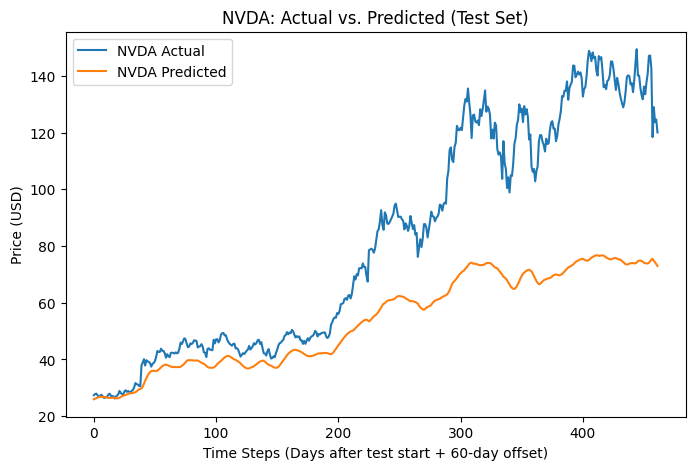

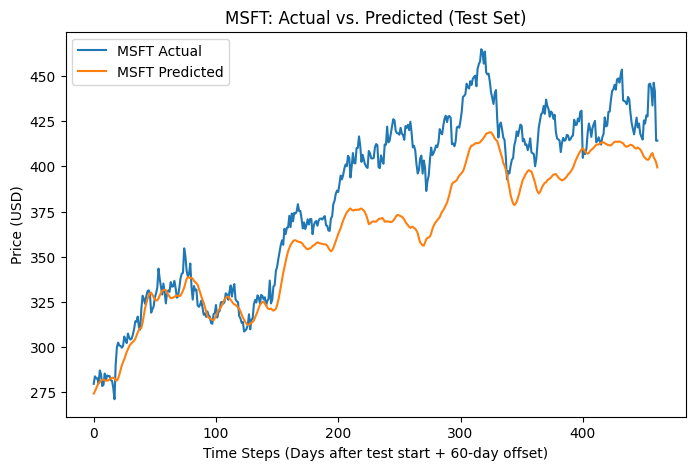

In [200]:

for i, symbol in enumerate(symbols):
    # Extract actual vs. predicted for this symbol (i)
    actual = y_test_true[:, i]
    predicted = y_test_pred[:, i]

    plt.figure(figsize=(8, 5))
    plt.plot(actual, label=f"{symbol} Actual")
    plt.plot(predicted, label=f"{symbol} Predicted")
    plt.legend()
    plt.title(f"{symbol}: Actual vs. Predicted (Test Set)")
    plt.xlabel("Time Steps (Days after test start + 60-day offset)")
    plt.ylabel("Price (USD)")
    plt.show()


In [201]:

def to_percentage_changes(price_array):
    """
    Convert an (N, 4) array of prices into (N-1, 4) array of daily % changes.
    """
    # Numerator: price_array[1:] - price_array[:-1]
    # Denominator: price_array[:-1]
    pct_changes = (price_array[1:] - price_array[:-1]) / price_array[:-1] * 100
    return pct_changes

# Transform actuals and predictions into % changes
y_test_true_pct = to_percentage_changes(y_test_true)
y_test_pred_pct = to_percentage_changes(y_test_pred)

# Now build a DataFrame for easier comparison
symbols_list = sorted(symbols)  # Make sure to have a consistent symbol order
comparison_df = pd.DataFrame()

for i, sym in enumerate(symbols_list):
    comparison_df[f'{sym}_Actual_%']    = y_test_true_pct[:, i]
    comparison_df[f'{sym}_Predicted_%'] = y_test_pred_pct[:, i]

# Inspect the first few rows
print(comparison_df.head(10))

   AAPL_Actual_%  AAPL_Predicted_%  META_Actual_%  META_Predicted_%  \
0       1.564420          0.382748       1.972671          0.383638   
1       0.770157          0.516038       0.533178          0.543052   
2      -0.324958          0.581190       0.774380          0.618690   
3      -1.129025          0.532417      -1.508938          0.678277   
4       0.549580          0.348564       2.184617          0.537287   
5      -1.597223          0.301620      -0.624725          0.592741   
6      -0.759133          0.111890      -0.419085          0.434931   
7      -0.435303         -0.066915       0.070136          0.272298   
8       3.410358         -0.189052       2.967290          0.200537   
9      -0.211408          0.014902       0.517361          0.435670   

   MSFT_Actual_%  MSFT_Predicted_%  NVDA_Actual_%  NVDA_Predicted_%  
0       1.438853          0.657920       1.496196          0.458784  
1       0.676817          0.795752      -0.371121          0.590827  
2      -

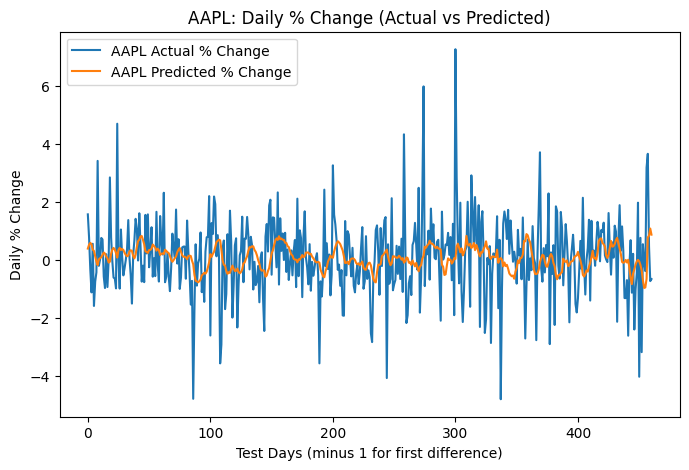

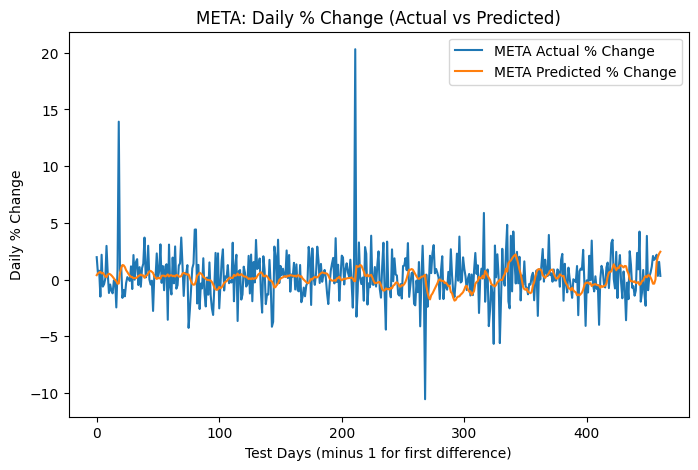

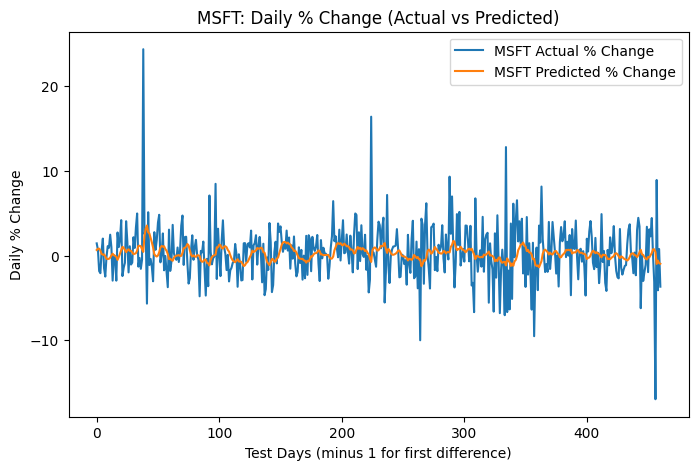

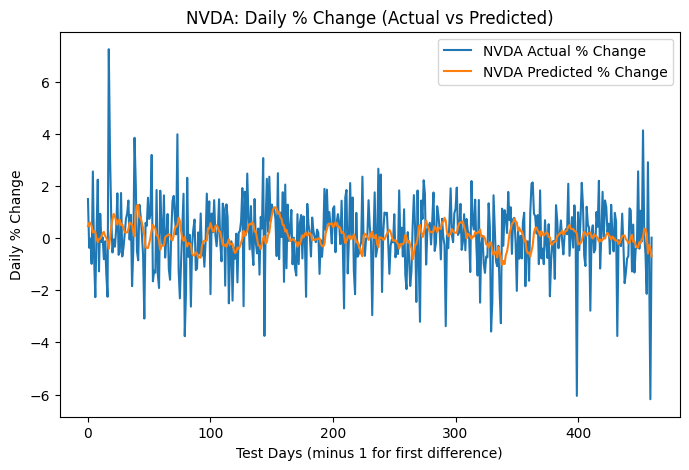

In [202]:
import matplotlib.pyplot as plt

for i, sym in enumerate(symbols_list):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test_true_pct[:, i], label=f"{sym} Actual % Change")
    plt.plot(y_test_pred_pct[:, i], label=f"{sym} Predicted % Change")
    plt.title(f"{sym}: Daily % Change (Actual vs Predicted)")
    plt.xlabel("Test Days (minus 1 for first difference)")
    plt.ylabel("Daily % Change")
    plt.legend()
    plt.show()


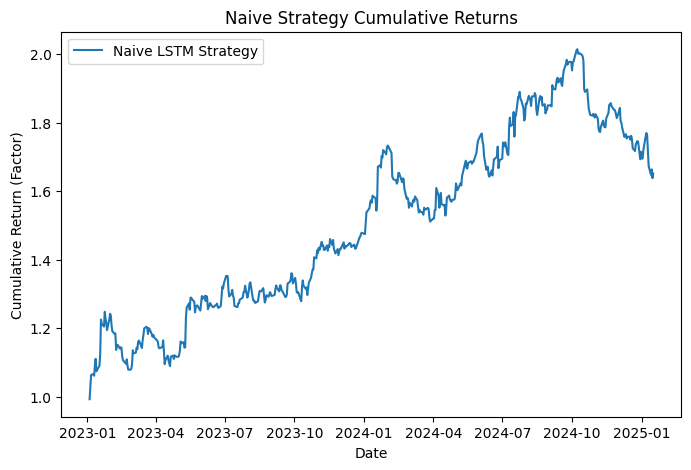

Final return over period: 65.18%


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.005] = 1
signals[predicted_changes < -0.005] = -1

# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (5) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (6) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (7) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (8) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="Naive LSTM Strategy")
plt.title("Naive Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (9) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period: {final_return * 100:.2f}%")


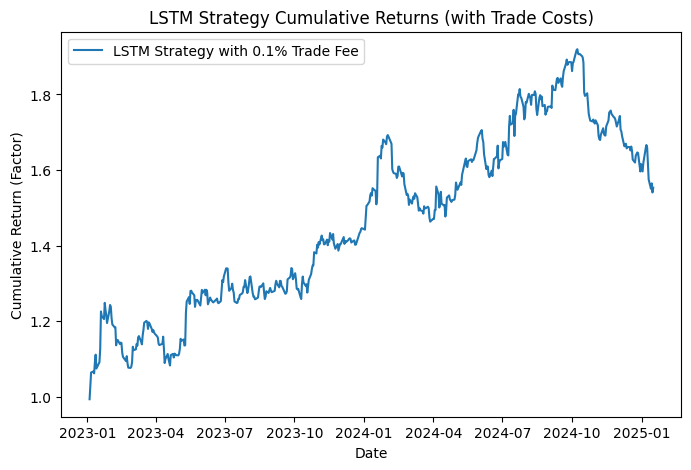

Final return over period (after fees): 55.33%


In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.005] = 1
signals[predicted_changes < -0.005] = -1


# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Calculate **trade cost mask** (detect when a trade occurs)
# A trade occurs when today's position != yesterday's position
trade_mask = (signals[1:] != signals[:-1])  # Shape (N-2, 4)
trade_costs = trade_mask * 0.1  # 0.1% per trade

# (5) Apply transaction costs: 
# Deduct trade cost when we enter or exit a trade
daily_symbol_returns[1:] -= trade_costs  # First row has no cost (since no prior trade)

# (6) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (7) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (8) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (9) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (10) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="LSTM Strategy with 0.1% Trade Fee")
plt.title("LSTM Strategy Cumulative Returns (with Trade Costs)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (11) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period (after fees): {final_return * 100:.2f}%")


# Predict price after 10 days

In [205]:
def create_sequences_multisymbol(dataset, lookback=10):
    """
    dataset: NumPy array of shape (num_days, 4) for 4 symbols
    lookback: number of timesteps to use as input
    
    Returns X, y:
      X.shape = (num_samples, lookback, 4)
      y.shape = (num_samples, 4)
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        seq_X = dataset[i : i + lookback]
        seq_y = dataset[i + lookback]
        X.append(seq_X)
        y.append(seq_y)
    return np.array(X), np.array(y)

lookback_window = 10
X_train_all, y_train_all = create_sequences_multisymbol(train_scaled, lookback_window)
X_test_all, y_test_all = create_sequences_multisymbol(test_scaled, lookback_window)

print("X_train_all shape:", X_train_all.shape)
print("y_train_all shape:", y_train_all.shape) 

print("X_test_all shape:", X_test_all.shape)
print("y_test_all shape:", y_test_all.shape)


X_train_all shape: (2663, 10, 4)
y_train_all shape: (2663, 4)
X_test_all shape: (512, 10, 4)
y_test_all shape: (512, 4)


In [206]:
model2 = keras.Sequential([
    layers.Input(shape=(lookback_window, 4)),
    # First LSTM layer returns the entire sequence for the next LSTM
    layers.LSTM(64, return_sequences=True),
    # Second LSTM layer returns the final output
    layers.LSTM(64, return_sequences=False),
    # Dense layer for your final output (4 symbols)
    layers.Dense(4)
])

model2.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10, 64)            17664     
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


In [207]:
history = model2.fit(
    X_train_all,
    y_train_all,
    epochs=20,
    batch_size=32,
    validation_split=0.1,   # 10% of training data used for validation
    verbose=1
)

Epoch 1/20
75/75 [==============================] - 3s 17ms/step - loss: 0.0088 - val_loss: 0.0311
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 9.0230e-04 - val_loss: 0.0101
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 5.1096e-04 - val_loss: 0.0044
Epoch 4/20
75/75 [==============================] - 1s 11ms/step - loss: 3.6806e-04 - val_loss: 0.0030
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 2.6249e-04 - val_loss: 0.0023
Epoch 6/20
75/75 [==============================] - 1s 11ms/step - loss: 2.3031e-04 - val_loss: 0.0032
Epoch 7/20
75/75 [==============================] - 1s 11ms/step - loss: 2.0705e-04 - val_loss: 0.0023
Epoch 8/20
75/75 [==============================] - 1s 11ms/step - loss: 2.4498e-04 - val_loss: 0.0030
Epoch 9/20
75/75 [==============================] - 1s 11ms/step - loss: 2.3483e-04 - val_loss: 0.0032
Epoch 10/20
75/75 [==============================] - 1s 11ms/step - loss: 2.1

In [208]:
pred_scaled = model2.predict(X_test_all)       # shape = (num_samples, 4)
y_test_pred = scaler.inverse_transform(pred_scaled)
y_test_true = scaler.inverse_transform(y_test_all)

print("Predicted shape:", y_test_pred.shape)
print("Actual shape:", y_test_true.shape)

# Print the first few predictions vs actual
for i in range(10):
    print(f"Day {i}: ")
    print("  Predicted:", y_test_pred[i])
    print("  Actual:   ", y_test_true[i])

16/16 [==============================] - 0s 3ms/step
Predicted shape: (512, 4)
Actual shape: (512, 4)
Day 0: 
  Predicted: [124.66905  137.56085   17.250084 222.69434 ]
  Actual:    [133.65597534 132.5138092   17.36437035 231.53831482]
Day 1: 
  Predicted: [125.79154  138.61      17.566315 222.91539 ]
  Actual:    [133.71528625 135.63188171  16.75281334 227.72859192]
Day 2: 
  Predicted: [126.6733   139.32878   17.807056 223.64328 ]
  Actual:    [136.28540039 138.83963013  17.82603455 235.86843872]
Day 3: 
  Predicted: [127.706726 140.11418   18.129137 225.07068 ]
  Actual:    [139.48822021 142.72480774  19.17905235 238.18569946]
Day 4: 
  Predicted: [128.76347  141.34375   18.524673 226.81004 ]
  Actual:    [140.8918457  142.59529114  19.25099564 237.65545654]
Day 5: 
  Predicted: [129.95389  142.79836   18.904507 228.38774 ]
  Actual:    [140.22953796 140.96153259  19.30895424 236.25137329]
Day 6: 
  Predicted: [131.10323  143.8574    19.273138 229.69102 ]
  Actual:    [142.30541992 

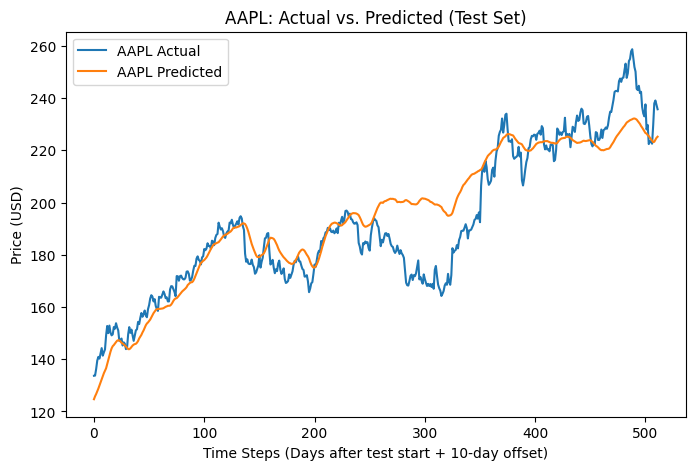

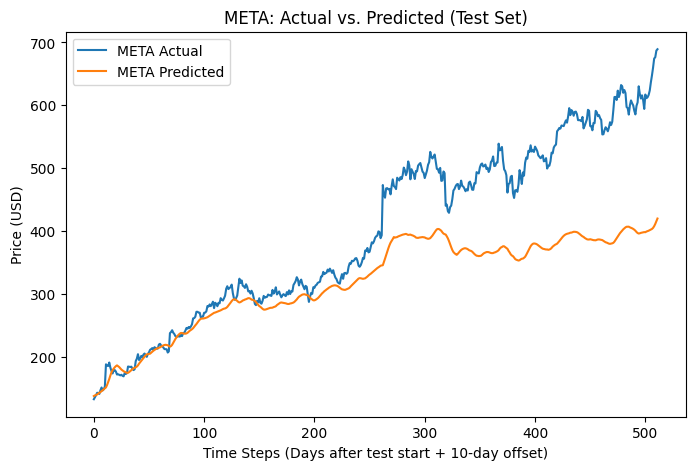

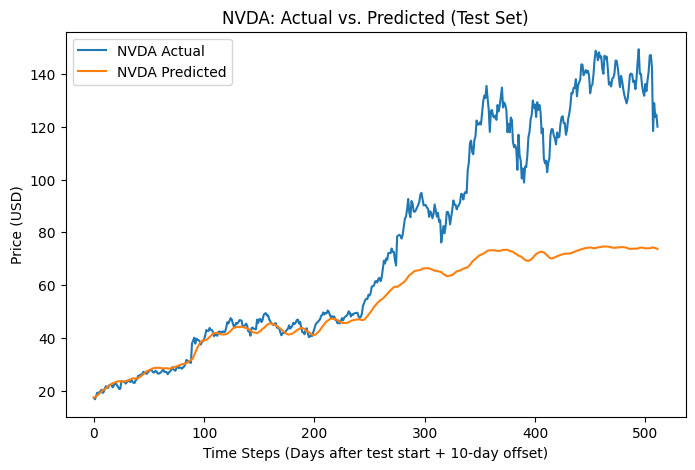

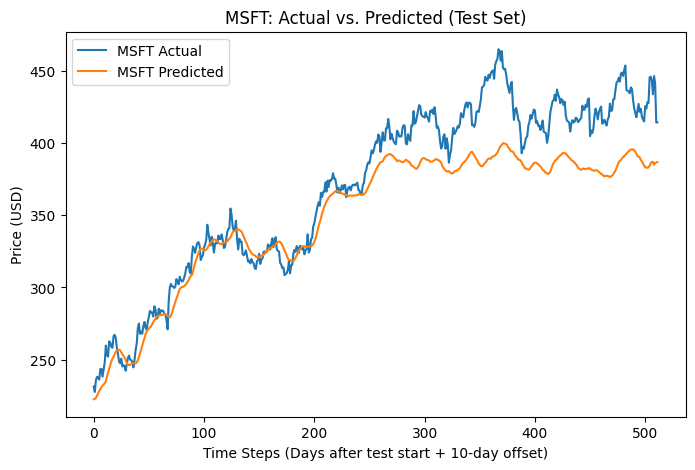

In [209]:

for i, symbol in enumerate(symbols):
    # Extract actual vs. predicted for this symbol (i)
    actual = y_test_true[:, i]
    predicted = y_test_pred[:, i]

    plt.figure(figsize=(8, 5))
    plt.plot(actual, label=f"{symbol} Actual")
    plt.plot(predicted, label=f"{symbol} Predicted")
    plt.legend()
    plt.title(f"{symbol}: Actual vs. Predicted (Test Set)")
    plt.xlabel("Time Steps (Days after test start + 10-day offset)")
    plt.ylabel("Price (USD)")
    plt.show()


In [210]:

def to_percentage_changes(price_array):
    """
    Convert an (N, 4) array of prices into (N-1, 4) array of daily % changes.
    """
    # Numerator: price_array[1:] - price_array[:-1]
    # Denominator: price_array[:-1]
    pct_changes = (price_array[1:] - price_array[:-1]) / price_array[:-1] * 100
    return pct_changes

# Transform actuals and predictions into % changes
y_test_true_pct = to_percentage_changes(y_test_true)
y_test_pred_pct = to_percentage_changes(y_test_pred)

# Now build a DataFrame for easier comparison
symbols_list = sorted(symbols)  # Make sure to have a consistent symbol order
comparison_df = pd.DataFrame()

for i, sym in enumerate(symbols_list):
    comparison_df[f'{sym}_Actual_%']    = y_test_true_pct[:, i]
    comparison_df[f'{sym}_Predicted_%'] = y_test_pred_pct[:, i]

# Inspect the first few rows
print(comparison_df.head(10))

   AAPL_Actual_%  AAPL_Predicted_%  META_Actual_%  META_Predicted_%  \
0       0.044376          0.900376       2.353017          0.762680   
1       1.922080          0.700969       2.365040          0.518563   
2       2.350083          0.815819       2.798320          0.563703   
3       1.006268          0.827480      -0.090746          0.877547   
4      -0.470082          0.924497      -1.145731          1.029126   
5       1.480346          0.884420       4.098947          0.741641   
6       1.368424          0.894346       3.014251          1.032135   
7      -2.007817          1.031605      -3.084210          1.133253   
8       0.902100          0.754546       1.298775          0.855945   
9       0.790093          0.663291       2.785791          0.944898   

   MSFT_Actual_%  MSFT_Predicted_%  NVDA_Actual_%  NVDA_Predicted_%  
0      -3.521907          1.833213      -1.645396          0.099263  
1       6.406215          1.370474       3.574363          0.326532  
2       

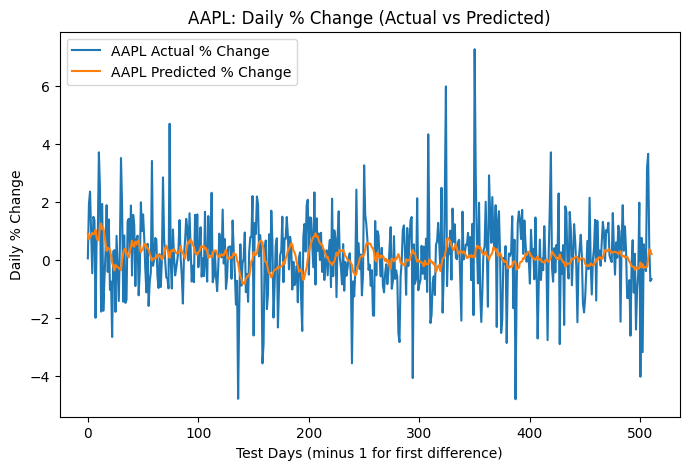

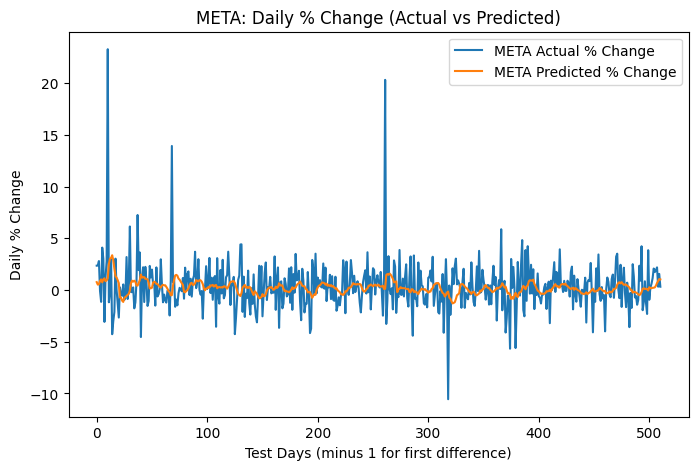

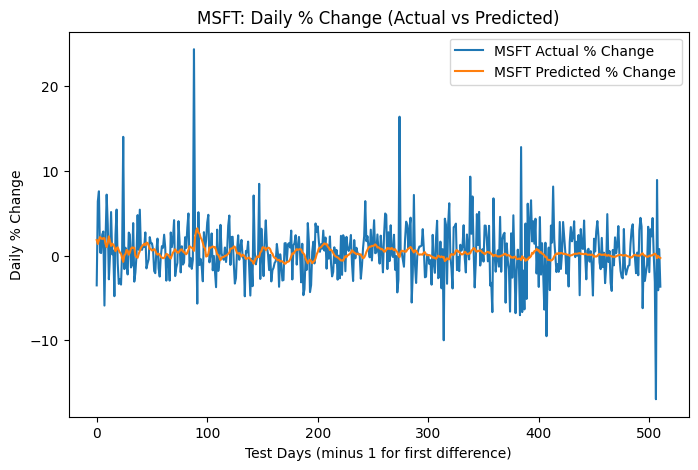

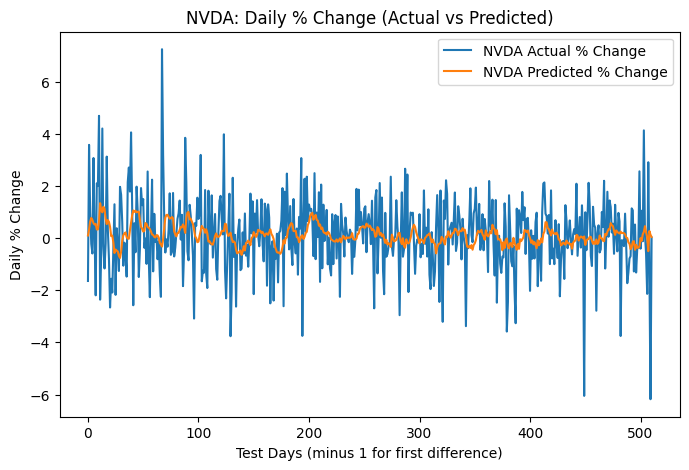

In [211]:
import matplotlib.pyplot as plt

for i, sym in enumerate(symbols_list):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test_true_pct[:, i], label=f"{sym} Actual % Change")
    plt.plot(y_test_pred_pct[:, i], label=f"{sym} Predicted % Change")
    plt.title(f"{sym}: Daily % Change (Actual vs Predicted)")
    plt.xlabel("Test Days (minus 1 for first difference)")
    plt.ylabel("Daily % Change")
    plt.legend()
    plt.show()

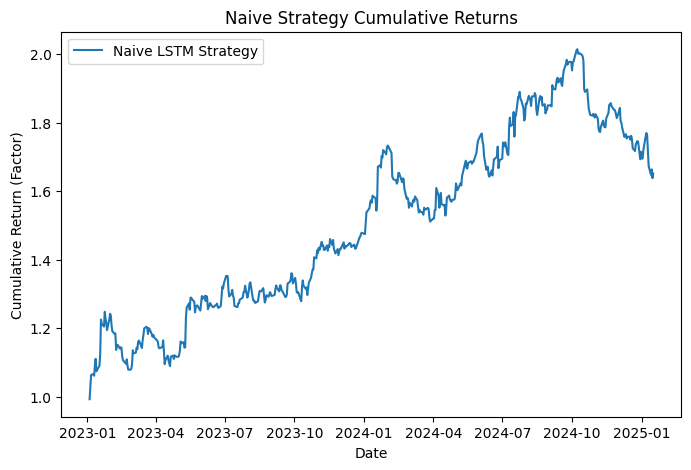

Final return over period: 65.18%


In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.005] = 1
signals[predicted_changes < -0.005] = -1


# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (5) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (6) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (7) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (8) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="Naive LSTM Strategy")
plt.title("Naive Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (9) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period: {final_return * 100:.2f}%")

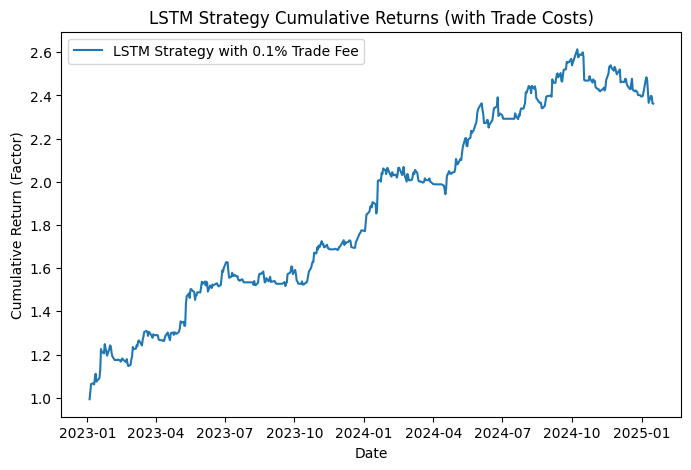

Final return over period (after fees): 136.20%


In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.005] = 1


# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Calculate **trade cost mask** (detect when a trade occurs)
# A trade occurs when today's position != yesterday's position
trade_mask = (signals[1:] != signals[:-1])  # Shape (N-2, 4)
trade_costs = trade_mask * 0.1  # 0.1% per trade

# (5) Apply transaction costs: 
# Deduct trade cost when we enter or exit a trade
daily_symbol_returns[1:] -= trade_costs  # First row has no cost (since no prior trade)

# (6) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (7) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (8) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (9) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (10) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="LSTM Strategy with 0.1% Trade Fee")
plt.title("LSTM Strategy Cumulative Returns (with Trade Costs)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (11) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period (after fees): {final_return * 100:.2f}%")

In [253]:

long_mask = (signals == 1)  # shape: (N-1, 4)

# Step 3: Check if actual changes were indeed positive on those days
# If actual_changes > 0, then it was a "correct long"
correct_when_long = long_mask & (actual_changes > 0)  # shape: (N-1, 4)

# Step 4: Compute accuracy only on days/symbols with a long signal
long_mask_flat = long_mask.ravel()
correct_when_long_flat = correct_when_long.ravel()

long_accuracy = correct_when_long_flat.sum() / long_mask_flat.sum()
print(f"Long-Only Accuracy: {long_accuracy * 100:.2f}%")


Long-Only Accuracy: 55.75%


In [252]:
# (A) Create masks for long vs. short
long_mask = (signals == 1)     # True/False array for when we went long
short_mask = (signals == -1)   # True/False array for when we went short

# (B) For each day/symbol, check if we were correct:
#     - Correct long if actual price change > 0
#     - Correct short if actual price change < 0
correct_when_long = long_mask & (actual_changes > 0)
correct_when_short = short_mask & (actual_changes < 0)

# (C) Flatten or sum them up directly. Example using sum:
num_correct_long = correct_when_long.sum()  
num_longs = long_mask.sum()
num_correct_short = correct_when_short.sum()
num_shorts = short_mask.sum()

# (D) Calculate accuracies
long_accuracy = num_correct_long / num_longs if num_longs > 0 else float('nan')
short_accuracy = num_correct_short / num_shorts if num_shorts > 0 else float('nan')

print(f"Long-Only Accuracy:  {long_accuracy*100:.2f}%  (on {num_longs} long signals)")
print(f"Short-Only Accuracy: {short_accuracy*100:.2f}% (on {num_shorts} short signals)")


Long-Only Accuracy:  55.75%  (on 1313 long signals)
Short-Only Accuracy: nan% (on 0 short signals)


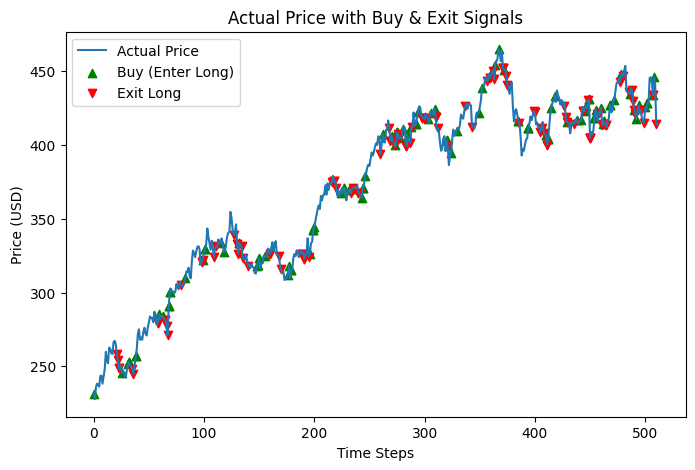

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 1) Identify BUY points: times when we *enter* a long
buy_indices = np.where(
    (signals[1:] == 1) & (signals[:-1] != 1)
)[0] + 1

# 2) Identify EXIT points: times when we *stop* being long
exit_indices = np.where(
    (signals[:-1] == 1) & (signals[1:] != 1)
)[0] + 1

# 3) Force a Buy at t=0 if we start in a long
if signals[0].any() == 1:
    buy_indices = np.concatenate(([0], buy_indices))

# 4) Force an Exit at t=T-1 if we end in a long
if signals[-1].any() == 1:
    exit_indices = np.concatenate((exit_indices, [len(signals) - 1]))

# 5) Plot only the actual price
plt.figure(figsize=(8, 5))
plt.plot(actual, label="Actual Price")

# 6) Overlay Buy signals as green upward triangles
plt.scatter(
    buy_indices, 
    actual[buy_indices], 
    marker="^", 
    color="green", 
    label="Buy (Enter Long)"
)

# 7) Overlay Exit signals as red downward triangles
plt.scatter(
    exit_indices, 
    actual[exit_indices], 
    marker="v", 
    color="red", 
    label="Exit Long"
)

# 8) Final labeling
plt.title("Actual Price with Buy & Exit Signals")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

